In [6]:
import torch
from transformers import AutoModelForCausalLM , AutoTokenizer
import scipy
import numpy as np
class LMHeadModel:

    def __init__(self, model_name):
        # Initialize the model and the tokenizer.
        self.model = AutoModelForCausalLM.from_pretrained(model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    def get_predictions(self, sentence):
        # Encode the sentence using the tokenizer and return the model predictions.
        inputs = self.tokenizer.encode(sentence, return_tensors="pt")
        with torch.no_grad():
            outputs = self.model(inputs)
            predictions = outputs[0]
        return predictions
    
    def get_next_word_probabilities(self, sentence, top_k=500):

        # Get the model predictions for the sentence.
        predictions = self.get_predictions(sentence)
        #print(predictions)
        
    
        # Get the next token candidates.
        next_token_candidates_tensor = predictions[0, -1, :]

        # Get the top k next token candidates.
        length = len(next_token_candidates_tensor)
        topk_candidates_indexes = torch.topk(
            next_token_candidates_tensor, length).indices.tolist()
        
        
        #printing 1st token tensor
        # print(next_token_candidates_tensor[0])

        
        #printing 1st token tensor in sorted arr
        # next_token_candidates_sort = torch.sort(next_token_candidates_tensor)
        # print(next_token_candidates_sort[1])


        # Get the token probabilities for all candidates.
        all_candidates_probabilities = torch.nn.functional.softmax(
            next_token_candidates_tensor, dim=-1)
        
        # all_candidates_prob_sorted = torch.nn.functional.softmax(next_token_candidates_sort,dim = -1)
        
        # Filter the token probabilities for the top k candidates.
        topk_candidates_probabilities = \
            all_candidates_probabilities[topk_candidates_indexes].tolist()

        # Decode the top k candidates back to words.
        topk_candidates_tokens = \
            [self.tokenizer.decode([idx]).strip() for idx in topk_candidates_indexes]#topk_candidates_indexes]

        #Return the top k candidates and their probabilities.
        return list(zip(topk_candidates_tokens, topk_candidates_probabilities))
      
        # output=list(zip(next_token_candidates_tensor,all_candidates_probabilities))
        # return output




In [48]:

sentence = "I enjoy walking in the park"
model = LMHeadModel("gpt2")
nextWordList2 =model.get_next_word_probabilities(sentence)

In [49]:
nextWor = nextWordList2[:20]
print(nextWor)

[(',', 0.19733373820781708), ('and', 0.17691311240196228), ('.', 0.16450658440589905), ('with', 0.0724589079618454), (',"', 0.0315912589430809), ('."', 0.014528450556099415), ('to', 0.0119084557518363), ('at', 0.011635614559054375), ('in', 0.01163259707391262), ('but', 0.011370671913027763), ('as', 0.010450010187923908), ('when', 0.009804600849747658), ('because', 0.009555508382618427), ('for', 0.009480640292167664), ('or', 0.008951948024332523), ('on', 0.00861478690057993), ('without', 0.007378293201327324), ('every', 0.007300795055925846), ('!', 0.007272831629961729), ('like', 0.007103597279638052)]


In [20]:
model.tokenizer.encode("I enjoy the rain")

[40, 2883, 262, 6290]

In [26]:
sorted_WordList = sorted(nextWor,key = lambda x:x[0])
print(sorted_WordList)

[(',', 0.20776639878749847), (',"', 0.022396011278033257), ('.', 0.13874691724777222), ('."', 0.012622976675629616), (';', 0.00638258270919323), ('all', 0.008114082738757133), ('and', 0.20550256967544556), ('as', 0.007477154489606619), ('at', 0.008005307987332344), ('but', 0.006967507302761078), ('every', 0.006402530707418919), ('for', 0.009969078004360199), ('in', 0.015990817919373512), ('on', 0.010368178598582745), ('or', 0.014856149442493916), ('to', 0.012878228910267353), ('when', 0.011121056042611599), ('where', 0.00713594863191247), ('with', 0.09822878986597061), ('without', 0.005586346611380577)]


In [31]:
prob_array = []
for i in range(len(sorted_WordList)):
    prob_array.append(sorted_WordList[i][1])
print(prob_array)
indexes=np.argsort(prob_array)
print(indexes)

[0.20776639878749847, 0.022396011278033257, 0.13874691724777222, 0.012622976675629616, 0.00638258270919323, 0.008114082738757133, 0.20550256967544556, 0.007477154489606619, 0.008005307987332344, 0.006967507302761078, 0.006402530707418919, 0.009969078004360199, 0.015990817919373512, 0.010368178598582745, 0.014856149442493916, 0.012878228910267353, 0.011121056042611599, 0.00713594863191247, 0.09822878986597061, 0.005586346611380577]
[19  4 10  9 17  7  8  5 11 13 16  3 15 14 12  1 18  2  6  0]


In [123]:
sorted_WordList2 = sorted(nextWordList2,key = lambda x:x[0])

In [147]:
wordlist1 = []
sum1 = 0
for i in range(len(sorted_WordList)):
    wordlist1 += [sorted_WordList[i][1]]
    sum1 += sorted_WordList[i][1]

In [149]:
wordlist2 = []
sum2 = 0
for i in range(len(sorted_WordList2)):
    wordlist2 += [sorted_WordList2[i][1]]
    sum2 += sorted_WordList2[i][1]

In [150]:
print(sum1)
print(sum2)

1.0000223959670422
1.0000232803630464


In [155]:
scipy.stats.entropy(wordlist1,wordlist2)

np.float64(0.05212793101147713)

In [4]:
import math

In [60]:
entropy_array = []
context_1_array = ['park']
context_2_array = ['woods']
context1 = 'park'
context2 = 'woods'
sentence = 'I enjoy walking in the'
sentence1 = sentence
sentence2 = sentence
for i in range(200):
   
    sentence1 = sentence1 +' '+ context1
    sentence2 = sentence2 +' '+ context2
    model = LMHeadModel("gpt2")
    nextWordList1 =model.get_next_word_probabilities(sentence1)
    nextWordList2 = model.get_next_word_probabilities(sentence2)
    
    sorted_WordList = sorted(nextWordList1,key = lambda x:x[0])
    sorted_WordList2 = sorted(nextWordList2,key = lambda x:x[0])
    
    wordlist1 = []
    wordlist2 = []

    for i in range(len(sorted_WordList)):
       wordlist1 += [sorted_WordList[i][1]]
    wordlist1 = np.array(wordlist1)
    for i in range(len(sorted_WordList2)):
       wordlist2 += [sorted_WordList2[i][1]]
    wordlist2 = np.array(wordlist2)

   #  wordlist1log = np.log10(wordlist1)#[-1*math.log(wordlist1[i]) if wordlist1[i]!=0 else wordlist1log[i] = 0 for i in range(len(wordlist1))]
   #  wordlist2log = np.log10(wordlist2)  #error check for cases with 0 probability

    #  wordlist1log = wordlist1log*(-1)
    #  wordlist2log = wordlist2log*(-1)
    indi_1 = np.argsort(wordlist1)
    indi_2 = np.argsort(wordlist2)
   #  print('most probable word context1: ', sorted_WordList[indi_1[-1]][0])
   #  print('most probable word context2: ', sorted_WordList2[indi_2[-1]][0])

    comb_wordlist = wordlist1+wordlist2
    #  sorted_comb_wordlist = sort(comb_wordlist)
    indexes=np.argsort(comb_wordlist)
    context1 = sorted_WordList[indexes[-1]][0]
    context2 = sorted_WordList[indexes[-2]][0]
    context_1_array.append(context1)
    context_2_array.append(context2)

    entropy_array += [scipy.stats.entropy(wordlist1,wordlist2)]


    
    

Text(0.5, 1.0, 'Entropy between prob dist for top two states at each iteration')

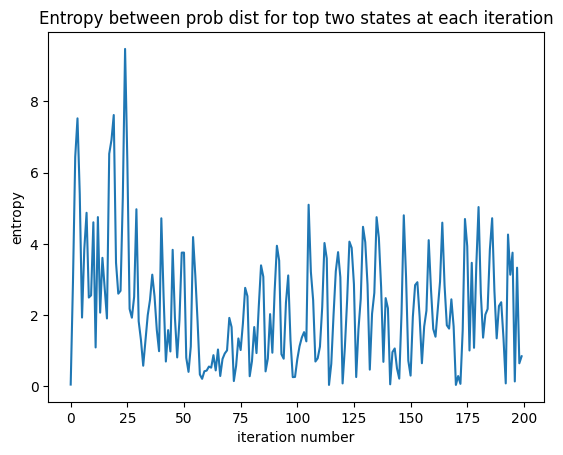

In [61]:
import matplotlib.pyplot as plt
plt.plot(entropy_array)
plt.ylabel('entropy')
plt.xlabel('iteration number')
plt.title('Entropy between prob dist for top two states at each iteration')

In [62]:
context_1_array

['park',
 ',',
 'but',
 'I',
 'to',
 'iled',
 "'",
 'em',
 'woods',
 'and',
 'of',
 'course',
 'I',
 "'s",
 'to',
 'beautiful',
 'place',
 'to',
 '.',
 '.',
 '.',
 'go',
 'I',
 '.',
 '.',
 '',
 '',
 '',
 '',
 '.',
 '',
 '',
 '',
 '',
 '',
 '.',
 '',
 '',
 '',
 '.',
 '',
 '',
 '',
 '',
 '.',
 '',
 '',
 '',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '',
 '',
 '',
 '',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '"',
 '',
 '.',
 '.',
 '.',
 '',
 '',
 '',
 '',


In [63]:
context_2_array

['woods',
 'and',
 'I',
 'like',
 "'m",
 'ama',
 'in',
 'the',
 'up',
 'state',
 "'",
 'cause',
 'it',
 'is',
 'a',
 'good',
 'time',
 '.',
 'I',
 'like',
 'to',
 '.',
 '.',
 '."',
 '',
 '.',
 '.',
 '"',
 '.',
 '',
 '.',
 '"',
 '.',
 '.',
 '"',
 '',
 '.',
 '.',
 '"',
 '',
 '.',
 '.',
 '"',
 '.',
 '',
 '.',
 '"',
 '.',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '',
 '.',
 '"',
 '"',
 '"',
 '"',
 '"',
 '"',
 '"',
 '"',
 '',
 '',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '"',
 '"',
 '"',
 '"',
 '"',
 '',
 '.',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '',
 '"',
 '',
 '',
 '',
 '.',
 '"',
 '"',
 '"',
 '"',
 '',

In [68]:
sentence1 = 'I enjoy walking in the'
sentence2 = 'I enjoy walking in the'

for i in range(2):
    sentence1 += " "+context_1_array[i]
    sentence2 += " "+context_2_array[i]
pred1=model.get_next_word_probabilities(sentence1)
pred2 = model.get_next_word_probabilities(sentence2)

In [69]:
print('pred1: ',pred1)

pred1:  [('but', 0.1111268401145935), ('and', 0.08671751618385315), ('I', 0.06310451775789261), ('it', 0.035463035106658936), ('so', 0.030700767412781715), ('especially', 0.019172513857483864), ('and', 0.016304558143019676), ('you', 0.016295479610562325), ('the', 0.015877604484558105), ('there', 0.011228283867239952), ('even', 0.010999857448041439), ('my', 0.010519306175410748), ('just', 0.009668167680501938), ('because', 0.009145958349108696), ('but', 0.00868363119661808), ('as', 0.007623390760272741), ('not', 0.007536185905337334), ('', 0.005540155805647373), ('which', 0.005367778241634369), ('.', 0.005352565087378025), ('it', 0.0051245493814349174), ('like', 0.004859939217567444), ('where', 0.004805372096598148), ('we', 0.004797276575118303), ('they', 0.004782293923199177), ('I', 0.004686040338128805), ('to', 0.004684824962168932), ('or', 0.004468177445232868), ('having', 0.004280381835997105), ('with', 0.003972048405557871), ('a', 0.003947818651795387), ('when', 0.00391542306169867

In [70]:
print('pred2: ',pred2)

pred2:  [('seeing', 0.08010109513998032), ('I', 0.03747737780213356), ('watching', 0.027622070163488388), ('playing', 0.02632722072303295), ('hiking', 0.0247515756636858), ('the', 0.02179807424545288), ('having', 0.01903090439736843), ('doing', 0.017295608296990395), ('talking', 0.01693832129240036), ('taking', 0.01642332226037979), ('looking', 0.01612989231944084), ('getting', 0.01579921692609787), ('exploring', 0.015476973727345467), ('shooting', 0.013858131133019924), ('enjoying', 0.013520180247724056), ('finding', 0.012745492160320282), ('it', 0.012223693542182446), ('being', 0.011364911682903767), ('feeling', 0.010170744732022285), ('trying', 0.010029347613453865), ('listening', 0.009811229072511196), ('hunting', 0.009809806942939758), ('hearing', 0.00965175312012434), ('going', 0.009040734730660915), ('reading', 0.008571620099246502), ('walking', 0.008216310292482376), ('making', 0.007924610748887062), ('meeting', 0.007530799601227045), ('thinking', 0.0066491528414189816), ('catc

In [74]:
sentence1 += ' '+context_1_array[2]
sentence2 += ' '+context_2_array[2]
pred3=model.get_next_word_probabilities(sentence1)
pred4 = model.get_next_word_probabilities(sentence2)

In [75]:
print(pred3)

[('I', 0.15325598418712616), ('ted', 0.06452782452106476), ('ts', 0.05193507671356201), ('it', 0.026614021509885788), ('che', 0.025123363360762596), ('also', 0.024034779518842697), ('not', 0.015614333562552929), ('am', 0.01331942155957222), ('my', 0.013307842426002026), ('the', 0.013208411633968353), ('have', 0.012452062219381332), ('when', 0.011996886692941189), ('for', 0.011930256150662899), ('can', 0.011598985642194748), ('ch', 0.01093246042728424), ('like', 0.010541032999753952), ('te', 0.009769560769200325), ('chers', 0.009661857970058918), ('ting', 0.009184237569570541), ('th', 0.009172752499580383), ('if', 0.008721904829144478), ('will', 0.008650465868413448), ('don', 0.007902763783931732), ('ter', 0.007436714600771666), ('at', 0.0071896761655807495), ('ters', 0.007171159610152245), ('still', 0.007016753777861595), ('that', 0.006640593055635691), ('tered', 0.006499544717371464), ('feel', 0.005939886439591646), ('you', 0.005903337150812149), ('do', 0.005768038798123598), ('want',

In [76]:
print(pred4) 

[("'m", 0.13158556818962097), ('said', 0.07272280752658844), ("'ve", 0.059626948088407516), ('have', 0.056608933955430984), ('do', 0.056484680622816086), ('was', 0.04029823839664459), ('always', 0.039134155958890915), ('can', 0.0351235494017601), ('am', 0.03349314257502556), ('did', 0.03236621618270874), ('don', 0.02387482300400734), ('think', 0.018274202942848206), ('like', 0.016872791573405266), ('say', 0.016359159722924232), ('never', 0.016050824895501137), ('love', 0.015751425176858902), ('know', 0.015602875500917435), ('would', 0.011377745307981968), ('used', 0.011315417475998402), ('feel', 0.011264769360423088), ('see', 0.010785719379782677), ('just', 0.009806732647120953), ('could', 0.00902653206139803), ('had', 0.008520237170159817), ('want', 0.008249407634139061), ('get', 0.007948645390570164), ('really', 0.007739320397377014), ("'ll", 0.006854147184640169), ('told', 0.0066641815938055515), ('should', 0.0066062696278095245), ('didn', 0.005730525590479374), ('walk', 0.005646246

In [5]:
entropy_array

[np.float64(0.39628983369955645),
 np.float64(1.300514840501166),
 np.float64(7.8096026213370315),
 np.float64(2.6027947440866175),
 np.float64(1.6724882896076552),
 np.float64(3.053758124634932),
 np.float64(1.5245485899420208),
 np.float64(0.8493889845162099),
 np.float64(1.1233115390266464),
 np.float64(0.7966471623525071),
 np.float64(0.7374896399766686),
 np.float64(1.4634347829067682),
 np.float64(0.9871295329767915),
 np.float64(4.749648582033588),
 np.float64(4.432421865055391),
 np.float64(3.4369143207784587),
 np.float64(1.3522097231759305),
 np.float64(0.7001798947988744),
 np.float64(10.803852412009547),
 np.float64(0.9323912765949777),
 np.float64(4.939558607218586),
 np.float64(6.689285957146785),
 np.float64(5.002564893572345),
 np.float64(1.3519514758964104),
 np.float64(1.127479493255913),
 np.float64(0.8513292809120838),
 np.float64(1.112670648157063),
 np.float64(0.8223759229387708),
 np.float64(0.9137018921907305),
 np.float64(1.051184300621967),
 np.float64(0.93821

Text(0.5, 1.0, 'Entropy between prob dist for top two states at each iteration')

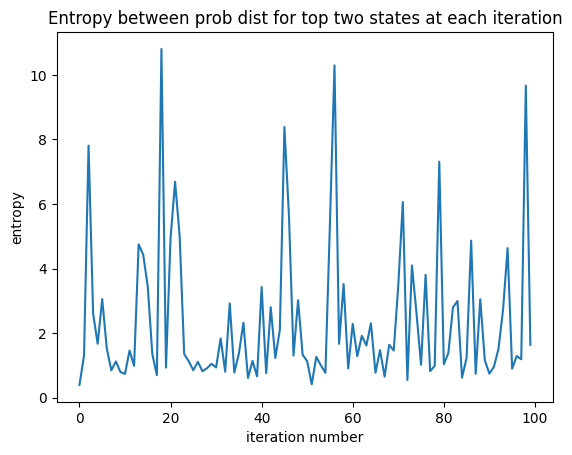

In [7]:
import matplotlib.pyplot as plt
plt.plot(entropy_array)
plt.ylabel('entropy')
plt.xlabel('iteration number')
plt.title('Entropy between prob dist for top two states at each iteration')

In [80]:
get=torch.sort(next_token_candidates_tensor,dim = -1)
print(get.values)

tensor([-112.9213, -112.5533, -112.4748,  ...,  -84.5720,  -83.6978,
         -83.2367])


In [58]:

sentence = "I enjoy walking in the woods"
model = LMHeadModel("gpt2")
nextWordList=model.get_next_word_probabilities(sentence)

tensor(-96.8352)


In [28]:
nextWordList = np.array(nextWordList)
print(nextWordList.shape)

(50257, 2)


In [29]:
sortednextWordList=np.sort(nextWordList,axis = -1)

In [42]:

sentence = "I enjoy walking in the"
model = LMHeadModel("gpt2")
model.get_next_word_probabilities(sentence, top_k=500)

[('park', 0.15904049575328827),
 ('woods', 0.10028108954429626),
 ('streets', 0.04183783754706383),
 ('dark', 0.031174374744296074),
 ('door', 0.02961907349526882),
 ('street', 0.02388927899301052),
 ('rain', 0.021734017878770828),
 ('city', 0.018898695707321167),
 ('same', 0.01503657829016447),
 ('halls', 0.013454659841954708),
 ('field', 0.012773651629686356),
 ('middle', 0.012384142726659775),
 ('garden', 0.010566969402134418),
 ('neighborhood', 0.010260550305247307),
 ('snow', 0.009522601962089539),
 ('forest', 0.009171221405267715),
 ('parks', 0.009017538279294968),
 ('open', 0.00845408346503973),
 ('world', 0.0075866952538490295),
 ('hallway', 0.006888187490403652),
 ('shoes', 0.00647016242146492),
 ('footsteps', 0.0062239086255431175),
 ('hall', 0.0059839216992259026),
 ('room', 0.005687463562935591),
 ('sun', 0.005530762020498514),
 ('doors', 0.004972364753484726),
 ('house', 0.00484781339764595),
 ('yard', 0.004810491111129522),
 ('sand', 0.004204212222248316),
 ('mud', 0.0038

In [7]:

sentence = "I enjoy walking in the woods"
model = LMHeadModel("gpt2")
model.get_next_word_probabilities(sentence, top_k=500)

[(',', 0.20776639878749847),
 ('and', 0.20550256967544556),
 ('.', 0.13874691724777222),
 ('with', 0.09822878986597061),
 (',"', 0.022396011278033257),
 ('in', 0.015990817919373512),
 ('or', 0.014856149442493916),
 ('to', 0.012878228910267353),
 ('."', 0.012622976675629616),
 ('when', 0.011121056042611599),
 ('on', 0.010368178598582745),
 ('for', 0.009969078004360199),
 ('all', 0.008114082738757133),
 ('at', 0.008005307987332344),
 ('as', 0.007477154489606619),
 ('where', 0.00713594863191247),
 ('but', 0.006967507302761078),
 ('every', 0.006402530707418919),
 (';', 0.00638258270919323),
 ('without', 0.005586346611380577),
 ('because', 0.005568686872720718),
 ('while', 0.005398344714194536),
 ('of', 0.004810223821550608),
 ('that', 0.0045852926559746265),
 ('!', 0.003866303013637662),
 ('like', 0.0037577133625745773),
 ('alone', 0.0034750779159367085),
 ('looking', 0.003363385098055005),
 ('sometimes', 0.003299690317362547),
 ('after', 0.003111026016995311),
 ('so', 0.002934111282229423